Plot climate_var data over Germany. 

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.util as cutil
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from netCDF4 import Dataset

Set spatial and temporal extend.

In [3]:
timesteps = 912
start_lon = 0
end_lon = 1440
start_lat = 0
end_lat = 721

Load .nc-file and save the relevant variables. This makes rendering much faster when the nc-file is large. In this example, you can skip this part and continue with the next cell which load the pickle files. 

Load the pickle-files. 

In [4]:
lats = np.load("parsed/lats", allow_pickle=True)
lons = np.load("parsed/lons", allow_pickle=True)
print(len(lats), len(lons))

climate_var = np.load("parsed/climate_var", allow_pickle=True)
climate_var = np.array(climate_var).reshape(timesteps,len(lats),len(lons) )



721 1440


Generate the plot. 

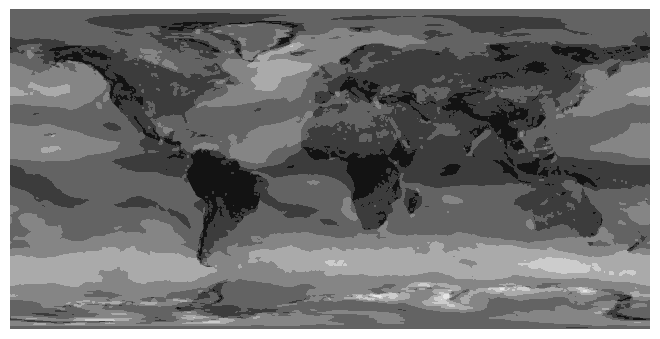

processing 8.33%
[0.0000e+00 2.5000e-01 5.0000e-01 ... 3.5925e+02 3.5950e+02 3.5975e+02]
[0.0000e+00 2.5000e-01 5.0000e-01 ... 3.5950e+02 3.5975e+02 3.6000e+02]


In [22]:
%matplotlib inline
from IPython.display import clear_output
import os
import time
from cartopy.util import add_cyclic_point

cmap = mpl.colormaps["Greys_r"]

scale_factor = 0.0003120164276888396
offset = 10.552331245928917

# Get the current time as a formatted string
timestamp = time.strftime("%Y%m%d_%H%M%S")

# Specify the name of the new directory with the timestamp
new_dir = "./output/" + timestamp

# Create the new directory
os.mkdir(new_dir)

steps = 1



for i in np.arange(0, timesteps, step = steps):
    print("processing {}%".format(round(100*i/(timesteps/steps),2)))
    data = climate_var[i]
    print(lons[0].values.flatten())
    # print(lons.reshape(-1).shape)

    dataFilled, lonsFilled = add_cyclic_point(data, coord = lons[0].values.flatten())
    print(lonsFilled)
    LONS, LATS = np.meshgrid(lonsFilled,lats)
    
    # set the axes' spatial projection, styling, and title
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.axis("off")
    
    plt.contourf(
        LONS,
        LATS,
        dataFilled,
        cmap = cmap,
        transform=ccrs.PlateCarree(),
        vmin = 0,
        vmax = 20
    )
    plt.tight_layout()
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
    plt.savefig("{}/frame_{}.jpg".format(new_dir, i), dpi=600)
    clear_output(wait = True)
    plt.pause(0.001)

